In [1]:
import sys
import lightgbm as lgb
sys.path.append('../')
from data import create_training_data, create_evaluation_data2
from pipeline import run_model_training, run_hyperparameter_tuning, run_model_training_quick, run_predictions

In [2]:
test_gw = 4

In [3]:
df = create_training_data("2020-21")
eval_df = create_evaluation_data2(session="test", gameweek_to_evaluate=test_gw)

create training data version 1.0 stable


..\data.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['event_points'] = input_df['event_points'].shift(1)


training set made!
test data version 0.4
current_gw to get data test for is 4


In [4]:
df

,name,ict_index,bps,now_cost,fdr,avg_minutes,ict_index_change,bps_change,event_points
0,Aaron Connolly,6.9,27,55,2,67.000000,3.5,30.0,1.0
1,Aaron Connolly,1.9,2,55,4,69.000000,-5.0,-25.0,8.0
2,Aaron Connolly,0.7,7,55,3,68.000000,-1.2,5.0,2.0
3,Aaron Connolly,3.0,13,55,3,56.800000,2.3,6.0,2.0
4,Aaron Connolly,0.0,0,55,2,47.333333,-3.0,-13.0,4.0
...,...,...,...,...,...,...,...,...,...
22158,Ã‡aglar SÃ¶yÃ¼ncÃ¼,2.3,13,53,2,41.161290,0.3,-12.0,6.0
22159,Ã‡aglar SÃ¶yÃ¼ncÃ¼,4.7,15,53,2,42.687500,2.4,2.0,2.0
22160,Ã‡aglar SÃ¶yÃ¼ncÃ¼,3.2,10,53,4,44.121212,-1.5,-5.0,2.0
22161,Ã‡aglar SÃ¶yÃ¼ncÃ¼,2.3,14,53,4,45.470588,-0.9,4.0,0.0


In [3]:
eval_df

,name,ict_index,bps,fdr,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Leno,0.0,0,2,49,67.50,-4.3,-20.0,0
1,Rúnarsson,0.0,0,2,40,0.00,0.0,0.0,0
2,Willian,0.0,0,2,63,0.00,0.0,0.0,0
3,Aubameyang,16.1,30,2,99,44.25,16.0,30.0,2
4,Cédric,2.5,5,2,44,47.00,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...
594,Cutrone,0.0,0,2,50,0.00,0.0,0.0,0
595,Cundle,0.0,0,2,45,0.00,0.0,0.0,0
596,Campbell,0.0,0,2,45,0.00,0.0,0.0,0
597,Marques,0.0,0,2,40,0.00,0.0,0.0,0


In [ ]:
best_hyperparams = run_hyperparameter_tuning(df)

In [5]:
import pickle
params = pickle.load(open("parameters_2021_19_09_17_06.pkl",'rb'))

In [6]:
params

{'n_estimators': 10000,
 'learning_rate': 0.049943937111835125,
 'num_leaves': 40,
 'max_depth': 12,
 'min_data_in_leaf': 200,
 'max_bin': 203,
 'lambda_l1': 80,
 'lambda_l2': 100,
 'min_gain_to_split': 14.22810676063775,
 'bagging_fraction': 0.7,
 'bagging_freq': 1,
 'feature_fraction': 0.9}

In [ ]:
model = run_model_training(params, df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

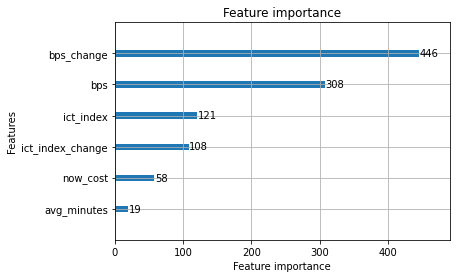

In [8]:
lgb.plot_importance(model[0])

In [9]:
used_features =  ['name', 'ict_index', 'bps', 'now_cost','avg_minutes','ict_index_change', 'bps_change']

In [10]:
preds = run_predictions(eval_df, "model_2021_19_09_14_17.pkl", session = "test", test_gw=test_gw, used_features=used_features)

Saving model...


In [13]:
preds.sort_values(by=["actual_gw_points"], ascending=False).head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
80,Marçal,2.1,11,45,90.000000,-2.3,-8.0,3.181710,13,4
2,Lukaku,7.1,6,115,60.000000,-13.6,-27.0,12.641775,13,4
176,Kovacic,2.9,4,50,68.666667,0.7,-4.0,1.658577,13,4
71,Cancelo,6.0,28,60,90.000000,2.8,10.0,3.703234,12,4
173,Zaha,3.5,10,69,90.000000,-0.5,3.0,1.704767,12,4
279,Townsend,4.5,11,55,58.000000,3.4,9.0,0.669961,12,4
0,Alexander-Arnold,13.3,24,75,90.000000,-4.9,-26.0,13.844529,12,4
170,Trossard,7.6,8,64,78.666667,4.9,1.0,1.755510,11,4
134,Bernardo,3.1,14,70,24.500000,-0.3,5.0,2.005101,10,4
132,Bernardo,3.1,14,70,24.500000,-0.3,5.0,2.005101,10,4


In [11]:
preds.head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
0,Alexander-Arnold,13.3,24,75,90.000000,-4.9,-26.0,13.844529,12,4
1,Antonio,21.2,46,78,89.333333,0.6,-21.0,13.524052,-1,4
2,Lukaku,7.1,6,115,60.000000,-13.6,-27.0,12.641775,13,4
3,Benrahma,4.7,10,63,88.000000,-7.0,-33.0,12.073288,3,4
4,Duffy,2.9,14,41,90.000000,-8.5,-23.0,11.243941,5,4
5,Tsimikas,1.8,4,42,61.333333,-8.1,-37.0,11.091711,0,4
6,Laporte,7.7,23,55,60.000000,-0.4,-15.0,10.309993,5,4
7,Rice,5.4,11,50,90.000000,-2.3,-23.0,9.834561,2,4
8,Klich,0.0,0,55,49.666667,-10.2,-28.0,9.808517,0,4
9,Mings,0.0,0,50,60.000000,-8.3,-47.0,9.756328,0,4
